In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame, Series

In [2]:
#!pip install mlxtend

In [3]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
#from mlxtend.preprocessing import TransactionEncoder

In [4]:
book=pd.read_csv("book.csv")
book.sample(5)

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
1035,1,1,1,1,0,0,1,0,0,0,0
1777,0,0,0,0,0,0,0,0,0,0,0
29,0,0,1,0,0,0,0,0,0,0,0
1208,1,0,0,0,0,0,0,0,0,0,0
1542,0,0,0,1,0,1,1,0,0,0,0


In [5]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [6]:
for i in book.columns:
    print(i)
    ddd=(book[i].value_counts())
    print(ddd)

ChildBks
0    1154
1     846
Name: ChildBks, dtype: int64
YouthBks
0    1505
1     495
Name: YouthBks, dtype: int64
CookBks
0    1138
1     862
Name: CookBks, dtype: int64
DoItYBks
0    1436
1     564
Name: DoItYBks, dtype: int64
RefBks
0    1571
1     429
Name: RefBks, dtype: int64
ArtBks
0    1518
1     482
Name: ArtBks, dtype: int64
GeogBks
0    1448
1     552
Name: GeogBks, dtype: int64
ItalCook
0    1773
1     227
Name: ItalCook, dtype: int64
ItalAtlas
0    1926
1      74
Name: ItalAtlas, dtype: int64
ItalArt
0    1903
1      97
Name: ItalArt, dtype: int64
Florence
0    1783
1     217
Name: Florence, dtype: int64


In [7]:
pd.crosstab(book.ChildBks,book.CookBks)

CookBks,0,1
ChildBks,,
0,804,350
1,334,512


<AxesSubplot:xlabel='ChildBks'>

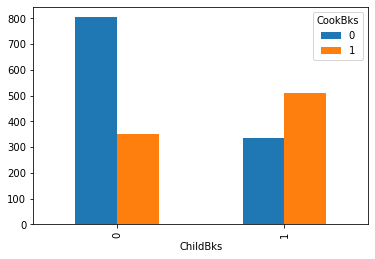

In [8]:
pd.crosstab(book.ChildBks,book.CookBks).plot(kind="bar")

## Apriori Algorithm

In [9]:
frequent_items1 = apriori(book, min_support=.1, use_colnames=True)
frequent_items1['length'] = frequent_items1['itemsets'].apply(lambda x: len(x))
frequent_items1

C:\Users\ajith\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1135,(ItalCook),1
8,0.1085,(Florence),1
9,0.1650,"(ChildBks, YouthBks)",2


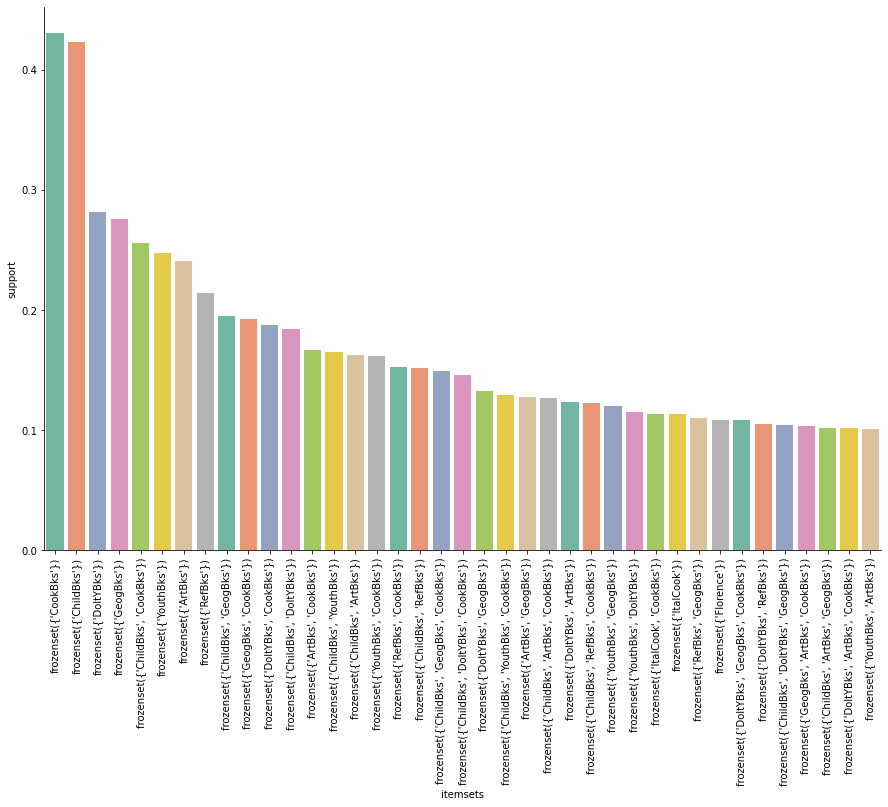

In [10]:
pal = sns.color_palette("Set2")
plt.figure(figsize = (15, 10))
sorted_df1 = frequent_items1.sort_values(by='support', ascending=False) # Sorting values in the dataset
sns.barplot(y=sorted_df1["support"], x=sorted_df1["itemsets"],palette=pal)
plt.xticks(rotation = 90, fontsize = 10) 
sns.despine() # removes the top and right border of our graph
plt.show()

In [11]:
frequent_items1.describe()

,support,length
count,39.000000,39.000000
mean,0.168103,2.025641
std,0.079586,0.706629
min,0.101000,1.000000
25%,0.113500,2.000000
50%,0.146000,2.000000
75%,0.190000,2.500000
max,0.431000,3.000000


Text(0.5, 1.0, 'Boxplot')

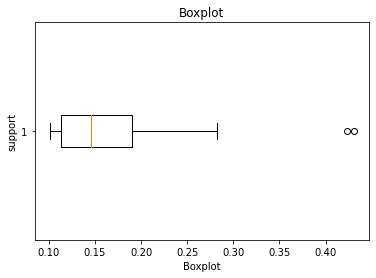

In [12]:
plt.boxplot(frequent_items1['support'],vert =False);plt.ylabel("support");plt.xlabel("Boxplot");plt.title("Boxplot")  # for vertical

In [13]:
frequent_items2 = apriori(book, min_support=0.2, use_colnames=True)
frequent_items2['length'] = frequent_items2['itemsets'].apply(lambda x: len(x))
frequent_items2

C:\Users\ajith\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.2560,"(ChildBks, CookBks)",2


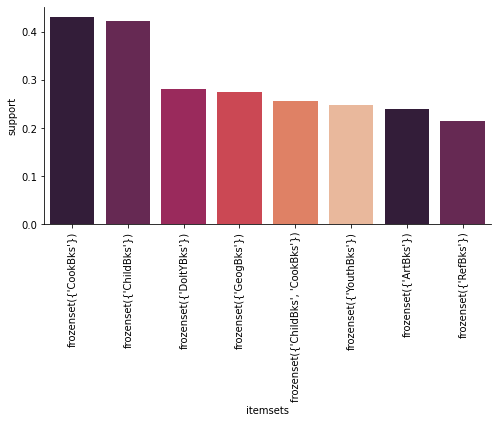

In [14]:
pal = sns.color_palette("rocket")
plt.figure(figsize = (8, 4))
sorted_df = frequent_items2.sort_values(by='support', ascending=False)
sns.barplot(y=sorted_df["support"], x=sorted_df["itemsets"],palette=pal)
plt.xticks(rotation = 90, fontsize = 10) 
sns.despine() # removes the top and right border of our graph
plt.show()

In [15]:
frequent_items2.describe()

,support,length
count,8.000000,8.000000
mean,0.296375,1.125000
std,0.083297,0.353553
min,0.214500,1.000000
25%,0.245875,1.000000
50%,0.266000,1.000000
75%,0.317250,1.000000
max,0.431000,2.000000


Text(0.5, 1.0, 'Boxplot')

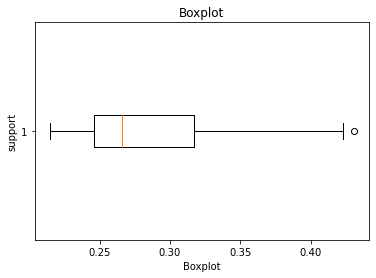

In [16]:
plt.boxplot(frequent_items2['support'],vert =False);plt.ylabel("support");plt.xlabel("Boxplot");plt.title("Boxplot")  # for vertical

In [17]:
frequent_items3 = apriori(book, min_support=0.3, use_colnames=True)
frequent_items3['length'] = frequent_items3['itemsets'].apply(lambda x: len(x))
frequent_items3

C:\Users\ajith\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.423,(ChildBks),1
1,0.431,(CookBks),1


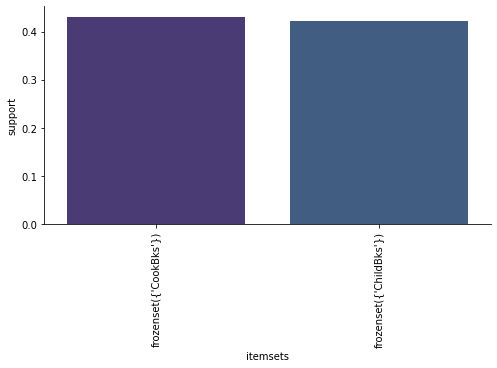

In [18]:
pal = sns.color_palette("viridis")
plt.figure(figsize = (8, 4))
sorted_df3 = frequent_items3.sort_values(by='support', ascending=False)
sns.barplot(y=sorted_df3["support"], x=sorted_df3["itemsets"],palette=pal)
plt.xticks(rotation = 90, fontsize = 10) 
sns.despine() # removes the top and right border of our graph
plt.show()

In [19]:
rules1 = association_rules(frequent_items1, metric="lift", min_threshold=1)
rules1
rules1.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
76,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
81,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
86,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
83,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
96,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
98,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


In [20]:
frequent_items1[ (frequent_items1['length'] == 2) &
                   (frequent_items1['support'] >= 0.2) ]

,support,itemsets,length
10,0.256,"(ChildBks, CookBks)",2


In [21]:
rules2 = association_rules(frequent_items2, metric="lift", min_threshold=1)
rules2
rules2.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


In [22]:
frequent_items2[ (frequent_items2['length'] == 2) &
                   (frequent_items2['support'] >= 0.2) ]

,support,itemsets,length
7,0.256,"(ChildBks, CookBks)",2


In [23]:
rules3 = association_rules(frequent_items3, metric="lift", min_threshold=1)
rules3
rules3.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


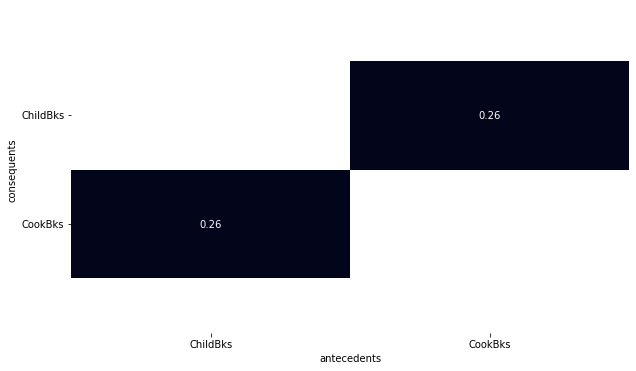

In [25]:
# Convert antecedents and consequents into strings
rules2['antecedents'] = rules2['antecedents'].apply(lambda a: ','.join(list(a)))
rules2['consequents'] = rules2['consequents'].apply(lambda a: ','.join(list(a)))

# Transform antecedent, consequent, and support columns into matrix
support_table = rules2.pivot(index='consequents', columns='antecedents', values='support')

plt.figure(figsize=(10,6))
sns.heatmap(support_table, annot=True, cbar=False)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.yticks(rotation=0)
plt.show() 

# The association rules we can come up with based on the above analysis are given below when min support is 20, lift is greater than 1 with high confidence :
## 1. if ChildBks then CookBks
## 2. if CookBks then ChildBks